In [35]:
%pylab inline
from pathlib import Path

Populating the interactive namespace from numpy and matplotlib


In [37]:
normalized_transactions_filepath = Path('../../datasets/berka_dataset/usable/normalized_transactions_100.npy')

timesteps = 100
transactions = np.load(normalized_transactions_filepath)
print(transactions.shape)

(53888, 100)


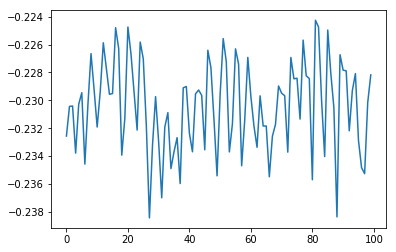

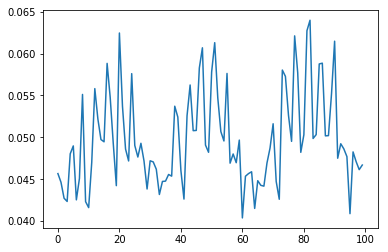

In [48]:
original_data_mean = np.mean(transactions, axis=0)
original_data_variance = np.var(transactions, axis=0)

plt.plot(original_data_mean)
plt.figure()
plt.plot(original_data_variance)

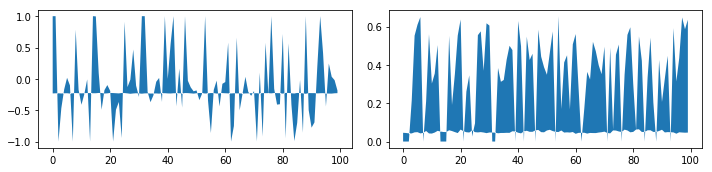

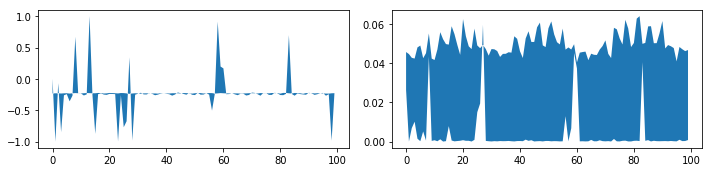

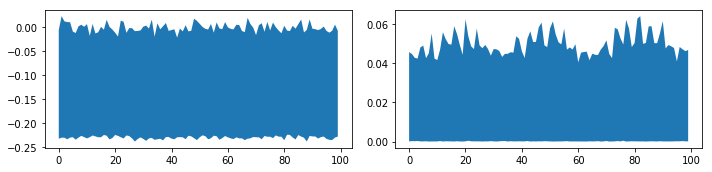

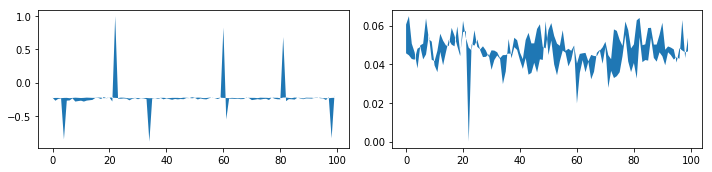

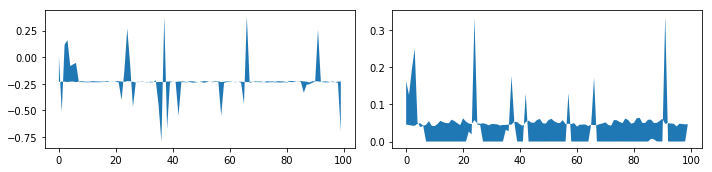

In [124]:
base_folder = Path('../generative_models/wgan')
x = np.arange(0.0, 100, 1)

statistics = []

for folder_name in base_folder.iterdir():
    if folder_name.is_dir():
        generated_data_filepath = folder_name / 'generated_datasets' / 'last.npy'
        generated_data = np.load(generated_data_filepath)
        
        generated_data_mean = np.mean(generated_data, axis=0)
        generated_data_variance = np.var(generated_data, axis=0)

        plt.subplots(1, 2, figsize=(10, 2.5))
        plt.subplot(1, 2, 1)
        plt.fill_between(x, original_data_mean, generated_data_mean)
        plt.subplot(1, 2, 2)
        plt.fill_between(x, original_data_variance, generated_data_variance)
        plt.tight_layout()
        
        total_mean_difference = np.sum(np.abs(generated_data_mean - original_data_mean))
        total_variance_difference = np.sum(np.abs(generated_data_variance - original_data_variance))
        
        key = str(folder_name).split('/')[-1]
        statistics.append((key, total_mean_difference, total_variance_difference))
statistics = np.array(statistics)

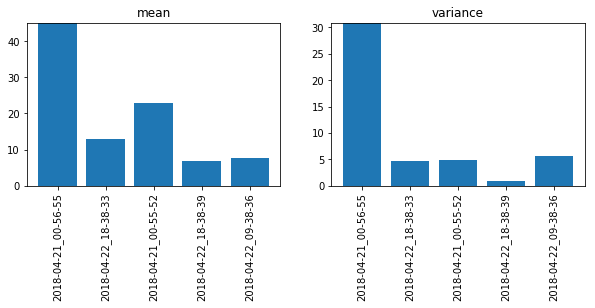

In [136]:
N = statistics.shape[0]

plt.subplots(1, 2, figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('mean')
plt.bar(range(N), statistics[:, 1].astype(float))
plt.ylim([0, np.max(statistics[:, 1].astype(float))])
plt.xticks(range(N), statistics[:,0].tolist(), rotation=90)

plt.subplot(1, 2, 2)
plt.title('variance')
plt.bar(range(N), statistics[:, 2].astype(float))
plt.ylim([0, np.max(statistics[:, 2].astype(float))])
plt.xticks(range(N), statistics[:,0].tolist(), rotation=90)
plt.show()

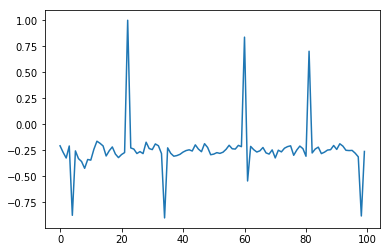

In [143]:
best_data = np.load(base_folder / '2018-04-22_18-38-39' / 'generated_datasets' / 'last.npy')
plt.plot(best_data[0])